![](https://perfectial.com/wp-content/uploads/2020/04/fraud-03-1024x421.jpg)

In [36]:
#importing library
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df = pd.read_csv('../input/PS_20174392719_1491204439457_log.csv')

In [4]:
#lets look into the data
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
print('\nTypes of transaction are :', list((df.PaymentType).drop_duplicates().values))

Fraud_trans = df.loc[df['isFraud'] == 1].PaymentType.drop_duplicates().values
print('\nTypes of payment method used for Fraud Payment are',Fraud_trans) #TRANSFER AND CASH_OUT



Types of transaction are : ['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN']

Types of payment method used for Fraud Payment are ['TRANSFER' 'CASH_OUT']


In [9]:
total_fradulent = len(df.loc[(df.isFraud == 1)])
print('\nTotal number of Fradulent Transaction are: ',total_fradulent) #8213

Fraud_Transfer= (df.loc[(df.isFraud == 1)&(df.PaymentType == 'TRANSFER')])

print('\nNumber of fradulent via Transfers: ',len(Fraud_Transfer))  #4097

Fraud_Cash_out = (df.loc[(df.isFraud == 1)&(df.PaymentType == 'CASH_OUT')])
print('\nNumber of fradulent via Cash_Out: ', len(Fraud_Cash_out))  #4116


Total number of Fradulent Transaction are:  8213

Number of fradulent via Transfers:  4097

Number of fradulent via Cash_Out:  4116


In [10]:
# #method of transaction used for isFlaggedFraud set up
FlaggedFraud_tran =  df.loc[df['isFlaggedFraud'] == 1].PaymentType.drop_duplicates().values
print('\nMethod of transaction used for isFlaggedFraud set: ',FlaggedFraud_tran)

FlaggedFraud_amt= len(df.loc[(df.amount > 200000)&(df.isFlaggedFraud == 1)&(df.PaymentType == 'TRANSFER')])
print('\nThe number of transaction having amount > 200,000 and transaction is in isFlaggedFraud set :',FlaggedFraud_amt)  #16

NotFlaggedFraud_amt= len(df.loc[(df.amount > 200000)&(df.isFlaggedFraud == 0)&(df.PaymentType == 'TRANSFER')])
print('\nThe number of TRANSFER having amount > 200,000 still being not set in isFlaggedFraud are :',NotFlaggedFraud_amt)  #409094

Max_NotisFlaggedFraud = (df.loc[(df.PaymentType == 'TRANSFER') &(df.isFlaggedFraud == 0)]).amount.max()
print('\nInfact, the maximum amount paid in isFlaggedFraud set via "TRANSFER" is', Max_NotisFlaggedFraud)  #92445516.64


Method of transaction used for isFlaggedFraud set:  ['TRANSFER']

The number of TRANSFER having amount > 200,000 still being not set in isFlaggedFraud are : 409094

Infact, the maximum amount paid in isFlaggedFraud set via "TRANSFER" is 92445516.64


In [11]:
Old_New_FlaggedFraud = len(df.loc[df.PaymentType == 'TRANSFER'].loc[(df[df.PaymentType == 'TRANSFER'].isFlaggedFraud ==0)&(df[df.PaymentType == 'TRANSFER'].OldBalanceDest == 0)&(df[df.PaymentType == 'TRANSFER'].NewBalanceDest == 0)])
print('\nThe number of TRANSFERs where isFlaggedFraud = 0, yet oldBalanceDest = 0 and newBalanceDest :',Old_New_FlaggedFraud)  #4158


The number of TRANSFERs where isFlaggedFraud = 0, yet oldBalanceDest = 0 and newBalanceDest : 4158


In [12]:
min_flagged_amt = round(df[df.isFlaggedFraud==1].OldBalanceOrg.min())
max_flagged_amt = round(df[df.isFlaggedFraud==1].OldBalanceOrg.max())

print('\nMin, Max amount of OldBalanceOrg for isFlaggdFraud set: ', min_flagged_amt,',', max_flagged_amt, 'respectively')  #353874, 19585040

min_notFlagged_amt = round(df[df.isFlaggedFraud==0].OldBalanceOrg.min())
max_notFlagged_amt = round(df[df.isFlaggedFraud==0].OldBalanceOrg.max())

print('\nMin, Max amount of OldBalanceOrg for isFlaggdFraud not set: ',min_notFlagged_amt,',', max_notFlagged_amt,'repectively')  #0, 59585040


Min, Max amount of OldBalanceOrg for isFlaggdFraud set:  353874 , 19585040 respectively

Min, Max amount of OldBalanceOrg for isFlaggdFraud not set:  0 , 59585040 repectively


In [13]:
dfFlagged = df.loc[df.isFlaggedFraud == 1]
dfNotFlagged = df.loc[df.isFlaggedFraud == 0]

In [14]:
FlaggedFraud_org = dfFlagged.NameOrig.isin(pd.concat([dfNotFlagged.NameOrig, dfNotFlagged.NameDest])).any()
print('\nHave originator involved in isFlaedFraud transaction have done transaction more than once?',FlaggedFraud_org)  #False

FlaggedFraud_dest = dfFlagged.NameOrig.isin(dfNotFlagged.NameOrig).any()
print('\nHave any destination account from isFlagedFraud set have made transaction more than once?',FlaggedFraud_dest)  #False

Fraud_acc = dfFlagged.NameDest.isin(dfNotFlagged.NameDest).sum()
print('\nNumber of destination account used for Fraud transaction more than once:',Fraud_acc)  #2


Have originator involved in isFlaedFraud transaction have done transaction more than once? False

Have any destination account from isFlagedFraud set have made transaction more than once? False

Number of destination account used for Fraud transaction more than once: 2


In [15]:
# for 'CASH_IN'
Merc_Cash_in =(df.loc[df.PaymentType == 'CASH_IN'].NameOrig.str.contains('M')).any()
print('\nAre Merchant involved in any transaction from origination account?',Merc_Cash_in)  #False

#for CASH_OUT
Merc_Cash_out =(df.loc[df.PaymentType == 'CASH_OUT'].NameDest.str.contains('M')).any()
print('\nAre Merchant involved in any transaction to destination account?',Merc_Cash_out)  #False


Are Merchant involved in any transaction from origination account? False

Are Merchant involved in any transaction to destination account? False


In [16]:
Orig_Merch = df.loc[df.NameOrig.str.contains('M')].any()
print('\nAre there any originator accounts which includes Merchant:',Orig_Merch)

Dest_Merch =  (df.loc[df.NameDest.str.contains('M')].PaymentType != 'PAYMENT').any()
print('\nIs there any transaction made to a merchant account, i.e is there any Merchant in dstination account:',Dest_Merch)


Are there any originator accounts which includes Merchant: step              False
PaymentType       False
amount            False
NameOrig          False
OldBalanceOrg     False
NewBalanceOrig    False
NameDest          False
OldBalanceDest    False
NewBalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

Is there any transaction made to a merchant account, i.e is there any Merchant in dstination account: False


In [17]:
Tran_Cash_out = Fraud_Transfer.NameDest.isin(Fraud_Cash_out.NameOrig).any()
print('\nAre there destinations for TRANSFERS that are also originators for CASH_OUTs for fraudelent transactions:',Tran_Cash_out)  #False


Are there destinations for TRANSFERS that are also originators for CASH_OUTs for fraudelent transactions: False


In [18]:
Not_Fraud = df.loc[df.isFraud == 0]
#The 3 accounts which such behaviour are:
NonFlagged = Fraud_Transfer.loc[Fraud_Transfer.NameDest.isin(Not_Fraud.loc[Not_Fraud.PaymentType == 'CASH_OUT'].NameOrig.drop_duplicates())]
print("Those destination account where fraudlent TRANSFER were made whcih were originator account for CASH_OUT: \n\n", NonFlagged)

Those destination account where fraudlent TRANSFER were made whcih were originator account for CASH_OUT: 

          step PaymentType      amount     NameOrig  OldBalanceOrg  \
1030443    65    TRANSFER  1282971.57  C1175896731     1282971.57   
6039814   486    TRANSFER   214793.32  C2140495649      214793.32   
6362556   738    TRANSFER   814689.88  C2029041842      814689.88   

         NewBalanceOrig     NameDest  OldBalanceDest  NewBalanceDest  isFraud  \
1030443             0.0  C1714931087             0.0             0.0        1   
6039814             0.0   C423543548             0.0             0.0        1   
6362556             0.0  C1023330867             0.0             0.0        1   

         isFlaggedFraud  
1030443               0  
6039814               0  
6362556               0  


In [19]:
X = df.loc[(df.PaymentType == 'TRANSFER') | (df.PaymentType == 'CASH_OUT')]
Y = X['isFraud']
del X['isFraud']

#removing irrelevant column for analysis
X = X.drop(['NameOrig', 'NameDest', 'isFlaggedFraud'], axis = 1)

# Changing the labelled data of TRANSFER transaction to 0 and CASH_OUT to 1
X.loc[X.PaymentType == 'TRANSFER', 'PaymentType'] = 0
X.loc[X.PaymentType == 'CASH_OUT', 'PaymentType'] = 1
X.PaymentType = X.PaymentType.astype(int)

In [20]:
XFraud = X.loc[Y == 1 ]
XnonFraud = X.loc[ Y == 0]

Fraud_Frac = len(XFraud.loc[(XFraud.OldBalanceDest == 0) & (XFraud.NewBalanceDest == 0) & (XFraud.amount)])/(1.0 * len(XFraud))
print('\nThe fraction of those fraud transaction which have both OldBalanceDest and NewBalancDest = 0 even if transaction amount is non-zero:',(Fraud_Frac))  #0.495555

#similarly for geniune transaction
NonFraud_Frac = len(XnonFraud.loc[(XnonFraud.OldBalanceDest == 0) & (XnonFraud.NewBalanceDest == 0) & (XnonFraud.amount)])/(1.0 * len(XnonFraud))
print('\nThe fraction of geniune transaction which have both OldBalanceDest and NewBalancDest = 0 even if transaction amount is non-zero:',(NonFraud_Frac))  #0.00061


The fraction of those fraud transaction which have both OldBalanceDest and NewBalancDest = 0 even if transaction amount is non-zero: 0.4955558261293072

The fraction of geniune transaction which have both OldBalanceDest and NewBalancDest = 0 even if transaction amount is non-zero: 0.0006176245277308345


In [21]:
X.loc[(X.OldBalanceDest == 0) & (X.NewBalanceDest == 0) & (X.amount != 0),\
      ['OldBalanceDest', 'NewBalanceDest']] = - 1

In [22]:
X.loc[(X.OldBalanceOrg == 0) & (X.NewBalanceOrig == 0) & (X.amount != 0),\
      ['OldBalanceOrg', 'NewBalanceOrig']] = np.nan

In [23]:
X['errorBalanceDest'] = X.OldBalanceDest + X.amount - X.NewBalanceDest
X['errorBalanceOrig'] = X.NewBalanceOrig + X.amount - X.OldBalanceOrg

In [29]:
limit = len(X)

def plotstrip(x , y , hue, figsize = (14,9)):
    fig = plt.figure(figsize = figsize)
    colours = plt.cm.tab10(np.linspace(0,1,9))
    with sns.axes_style('ticks'):
        ax = sns.stripplot(x,y,hue = hue,jitter = 0.4, marker = '.',size = 4, palette = colours)

        ax.set_xlabel('')
        ax.set_xticklabels(['genuine', 'fradulent'], size = 16)

        for axis in ['top', 'bottom', 'left', 'right']:
            ax.spines[axis].set_linewidth(2)

        handles, labels = ax.get_legend_handles_labels()

        plt.legend(handles, ['Transfer', 'Cash_out'], bbox_to_anchor=(1,1), \
                  loc = 2, borderaxespad = 0, fontsize = 16);


        return ax

In [33]:
ax = plotstrip(Y[:limit], X.step[:limit], X.PaymentType[:limit])
ax.set_ylabel('time [hour]', size = 16)
ax.set_title('Striped vs. homogenous fingerprints of genuine and fraudulent \
transactions over time', size = 20);

In [34]:
limit = len(X)

ax = plotstrip(Y[:limit], X.amount[:limit], X.PaymentType[:limit], figsize = (14,9))
ax.set_ylabel('amount', size = 16)
ax.set_title('Dispersion of genuine and fraudelent transaction with amount', size=25);


In [32]:
limit = len(X)
ax = plotstrip(Y[:limit], -X.errorBalanceDest[:limit], X.PaymentType[:limit], figsize = (14,9))

ax.set_ylabel('-errorBalanceDest', size = 16)
ax.set_title('Oppsite ploarity fingerprint over the error in \ destination account balances', size = 18)



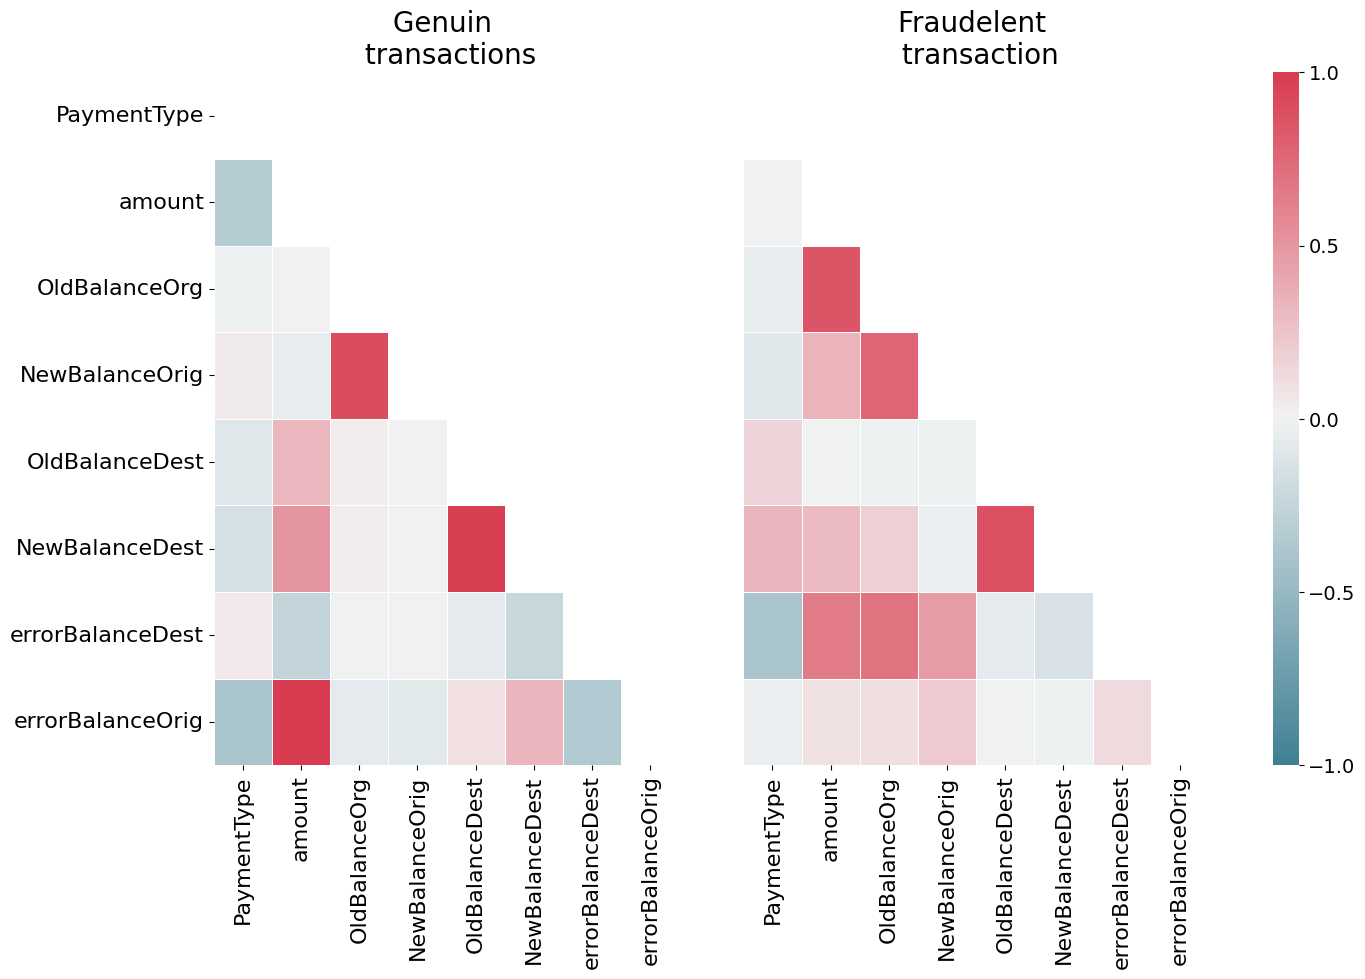

In [35]:
Xfraud = X.loc[Y==1]
XnonFraud = X.loc[Y==0]

correlationNonFraud = XnonFraud.loc[:, X.columns !='step'].corr()
mask = np.zeros_like(correlationNonFraud)
indices = np.triu_indices_from(correlationNonFraud)
mask[indices] = True

grid_kws = {"width_ratios":(.9, .9, .05), "wspace" : 0.2}
f, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw=grid_kws,\
                                     figsize = (14, 9))

cmap = sns.diverging_palette(220, 8, as_cmap= True)
ax1 =sns.heatmap(correlationNonFraud, ax = ax1, vmin = -1, vmax = 1, \
    cmap = cmap, square = False, linewidths = 0.5, mask = mask, cbar = False)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 16);
ax1.set_yticklabels(ax1.get_xticklabels(), size = 16);
ax1.set_title('Genuin \n transactions', size = 20)

correlationFruad = Xfraud.loc[:, X.columns !='step'].corr()
ax2 = sns.heatmap(correlationFruad, vmin = -1, vmax = 1, cmap = cmap, \
 ax = ax2, square = False, linewidths = 0.5, mask = mask, yticklabels = False, \
    cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical', \
                                 'ticks': [-1, -0.5, 0, 0.5, 1]})

ax2.set_xticklabels(ax2.get_xticklabels(), size = 16);

ax2.set_title('Fraudelent \n transaction', size = 20);

cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size = 14);
